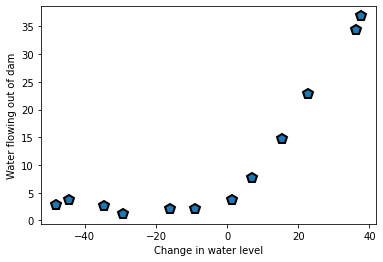

In [1]:
import pandas as pd
import numpy as np
from scipy.io import loadmat
from scipy import optimize
import os
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

data=loadmat(os.path.join('Data',"ex5/ex5data1.mat"))

x, y = data['X'], data['y'][:, 0]
xtest, ytest = data['Xtest'], data['ytest'][:, 0]
xval, yval = data['Xval'], data['yval'][:, 0]
m=y.size
plt.plot(x,y,'p',ms=10,mec='k',mew=2)
plt.xlabel("Change in water level")
plt.ylabel("Water flowing out of dam")

def linearRegCostFun(x,y,theta,lambda_=0.0):
    J=0
    grad=np.zeros(theta.shape)
    m=y.size
    h=x.dot(theta.T)
    
    J=(1/(2*m))*np.sum(np.square(h-y))+(lambda_/(2*m)*np.sum(np.square(theta[1:])))                                 
    grad=(1/m)*((h-y).dot(x))
    grad[1:]=grad[1:]+(lambda_/m)*theta[1:]
    return J,grad

def polyFeatures(x,p):
    x_poly=np.zeros((x.shape[0],p))
    for i in range(1,p+1):
        x_poly[:,i-1]=x[:,0]**i
    return x_poly

def normalizeFeatures(x):
    mu = np.mean(x, axis=0)
    x_norm = x - mu
    sigma = np.std(x_norm, axis=0, ddof=1)
    x_norm /= sigma
    return x_norm, mu, sigma

def trainLinearReg(linearRegCostFun, x, y, lambda_=0.0, maxiter=200):
    initial_theta = np.zeros(x.shape[1])
    costFunction = lambda t: linearRegCostFun(x, y, t, lambda_)
    options = {'maxiter': maxiter}
    res = optimize.minimize(costFunction, initial_theta, jac=True, method='TNC', options=options)
    return res.x

def learningCurve(x,y,xval,yval,lambda_=0):
    m = y.size
    error_train = np.zeros(m)
    error_val   = np.zeros(m)
    for i in range(1,m+1):
        theta_t=trainLinearReg(linearRegCostFun,x[:i],y[:i],lambda_=lambda_)
        error_train[i-1],_=linearRegCostFun(x[:i],y[:i],theta_t,lambda_=0)
        error_val[i-1],_=linearRegCostFun(xval,yval,theta_t,lambda_=0)
    return error_train, error_val

def plotFit(polyFeatures, min_x, max_x, mu, sigma, theta, p):
    x = np.arange(min_x - 15, max_x + 25, 0.05).reshape(-1, 1)
    X_poly = polyFeatures(x, p)
    X_poly -= mu
    X_poly /= sigma
    X_poly = np.concatenate([np.ones((x.shape[0], 1)), X_poly], axis=1)
    plt.plot(x, np.dot(X_poly, theta), '--', lw=2)

def validationCurve(x, y, xval, yval):
    lambda_vec = [0, 0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1, 3, 10]
    error_train = np.zeros(len(lambda_vec))
    error_val = np.zeros(len(lambda_vec))
    for i in range(len(lambda_vec)):
        l=lambda_vec[i]
        theta_t=trainLinearReg(linearRegCostFun,x,y,lambda_=l)
        error_train[i],_=linearRegCostFun(x,y,theta_t,0)
        error_val[i],_=linearRegCostFun(xval,yval,theta_t,0)
    return lambda_vec, error_train, error_val

# Training Examples	Train Error	Cross Validation Error
  	1		0.000000	205.121096
  	2		0.000000	110.302641
  	3		3.286595	45.010231
  	4		2.842678	48.368910
  	5		13.154049	35.865165
  	6		19.443963	33.829962
  	7		20.098522	31.970986
  	8		18.172859	30.862446
  	9		22.609405	31.135998
  	10		23.261462	28.936207
  	11		24.317250	29.551432
  	12		22.373906	29.433818


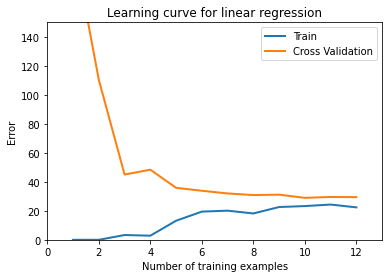

In [2]:
X_aug = np.concatenate([np.ones((m, 1)), x], axis=1)
Xval_aug = np.concatenate([np.ones((yval.size, 1)), xval], axis=1)
error_train, error_val = learningCurve(X_aug, y, Xval_aug, yval, lambda_=0)

plt.plot(np.arange(1, m+1), error_train, np.arange(1, m+1), error_val, lw=2)
plt.title('Learning curve for linear regression')
plt.legend(['Train', 'Cross Validation'])
plt.xlabel('Number of training examples')
plt.ylabel('Error')
plt.axis([0, 13, 0, 150])

print('# Training Examples\tTrain Error\tCross Validation Error')
for i in range(m):
    print('  \t%d\t\t%f\t%f' % (i+1, error_train[i], error_val[i]))

In [3]:
p = 8
m=y.size
# Map X onto Polynomial Features and Normalize
X_poly = polyFeatures(x, p)
X_poly, mu, sigma = normalizeFeatures(X_poly)
X_poly = np.concatenate([np.ones((m, 1)), X_poly], axis=1)

# Map X_poly_test and normalize (using mu and sigma)
X_poly_test = polyFeatures(xtest, p)
X_poly_test -= mu
X_poly_test /= sigma
X_poly_test = np.concatenate([np.ones((ytest.size, 1)), X_poly_test], axis=1)

# Map X_poly_val and normalize (using mu and sigma)
X_poly_val = polyFeatures(xval, p)
X_poly_val -= mu
X_poly_val /= sigma
X_poly_val = np.concatenate([np.ones((yval.size, 1)), X_poly_val], axis=1)

print('Normalized Training Example 1:')
X_poly[0, :]

Normalized Training Example 1:


array([ 1.        , -0.36214078, -0.75508669,  0.18222588, -0.70618991,
        0.30661792, -0.59087767,  0.3445158 , -0.50848117])

Polynomial Regression (lambda = 3.000000)

# Training Examples	Train Error	Cross Validation Error
  	1		0.000000	138.846777
  	2		0.080704	143.808317
  	3		15.062851	6.660747
  	4		9.168031	4.322521
  	5		7.265773	4.511018
  	6		5.748444	4.861816
  	7		5.782694	4.230118
  	8		4.879505	4.360617
  	9		4.641373	4.792851
  	10		4.232232	4.684220
  	11		3.820540	4.807688
  	12		4.901371	3.822930


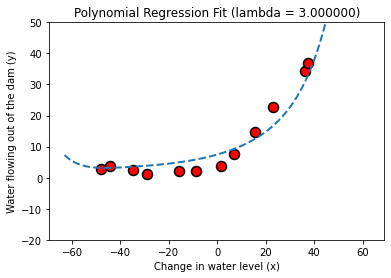

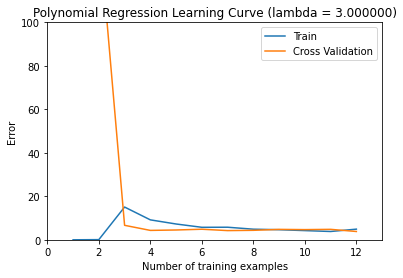

In [4]:
lambda_ = 3
theta = trainLinearReg(linearRegCostFun, X_poly, y,
                             lambda_=lambda_, maxiter=55)

# Plot training data and fit
plt.plot(x, y, 'ro', ms=10, mew=1.5, mec='k')

plotFit(polyFeatures, np.min(x), np.max(x), mu, sigma, theta, p)

plt.xlabel('Change in water level (x)')
plt.ylabel('Water flowing out of the dam (y)')
plt.title('Polynomial Regression Fit (lambda = %f)' % lambda_)
plt.ylim([-20, 50])

plt.figure()
error_train, error_val = learningCurve(X_poly, y, X_poly_val, yval, lambda_)
plt.plot(np.arange(1, 1+m), error_train, np.arange(1, 1+m), error_val)

plt.title('Polynomial Regression Learning Curve (lambda = %f)' % lambda_)
plt.xlabel('Number of training examples')
plt.ylabel('Error')
plt.axis([0, 13, 0, 100])
plt.legend(['Train', 'Cross Validation'])

print('Polynomial Regression (lambda = %f)\n' % lambda_)
print('# Training Examples\tTrain Error\tCross Validation Error')
for i in range(m):
    print('  \t%d\t\t%f\t%f' % (i+1, error_train[i], error_val[i]))

lambda		Train Error	Validation Error
 0.000000	0.029686	43.849641
 0.001000	0.112684	9.872207
 0.003000	0.170937	16.304746
 0.010000	0.221505	16.943800
 0.030000	0.281840	12.829510
 0.100000	0.459324	7.586857
 0.300000	0.921763	4.636826
 1.000000	2.076201	4.260600
 3.000000	4.901371	3.822930
 10.000000	16.092273	9.945554


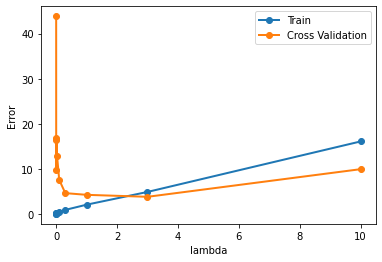

In [5]:
lambda_vec, error_train, error_val = validationCurve(X_poly, y, X_poly_val, yval)

plt.plot(lambda_vec, error_train, '-o', lambda_vec, error_val, '-o', lw=2)
plt.legend(['Train', 'Cross Validation'])
plt.xlabel('lambda')
plt.ylabel('Error')

print('lambda\t\tTrain Error\tValidation Error')
for i in range(len(lambda_vec)):
    print(' %f\t%f\t%f' % (lambda_vec[i], error_train[i], error_val[i]))

In [6]:
def predict_waterflowing(x):
    xp=np.zeros(9)
    for i in range(1,9):
        xp[i]=x**i
    xp[1:]=xp[1:]-mu
    xp[1:]=xp[1:]/sigma
    xp[0]=1
    y=xp.dot(theta.T)
    return y

In [7]:
#Call the function with change in water level as input to predict water flowing out of the dam
predict_waterflowing(5)

8.709454059624296